In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [28]:
test_data=pd.read_csv('car_data.csv',index_col=1)


In [29]:
test_data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,,,,,,,,
2014,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0
2013,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0
2017,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0
2011,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0
2014,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [30]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 2014 to 2016
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 21.2+ KB


In [31]:
test_data.isnull().sum()

Car_Name         0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [32]:
test_data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,,,,,,,,
2014,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0
2013,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0
2017,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0
2011,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0
2014,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [33]:
print(test_data.Fuel_Type.unique())
print(test_data.Seller_Type.unique())
print(test_data.Transmission.unique())


['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [34]:
test_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
test_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
test_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\swapn\AppData\Local\Temp\ipykernel_2076\2237250065.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\swapn\AppData\Local\Temp\ipykernel_2076\2237250065.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\swapn\AppData\Local\Temp\ipykernel_2076\2237250065.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futu

In [35]:
test_data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,,,,,,,,
2014,ritz,3.35,5.59,27000,0,0,0,0
2013,sx4,4.75,9.54,43000,1,0,0,0
2017,ciaz,7.25,9.85,6900,0,0,0,0
2011,wagon r,2.85,4.15,5200,0,0,0,0
2014,swift,4.60,6.87,42450,1,0,0,0


In [36]:
x=test_data.drop(['Car_Name','Selling_Price'],axis=1)
y=test_data['Selling_Price']

In [40]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=1,test_size=0.2)

In [41]:
model=Lasso()

In [42]:
model.fit(x,y)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [43]:
pred_values=model.predict(train_x)


In [44]:
error_score=metrics.r2_score(train_y,pred_values)
print("r2 value:",error_score)

r2 value: 0.791720714876044


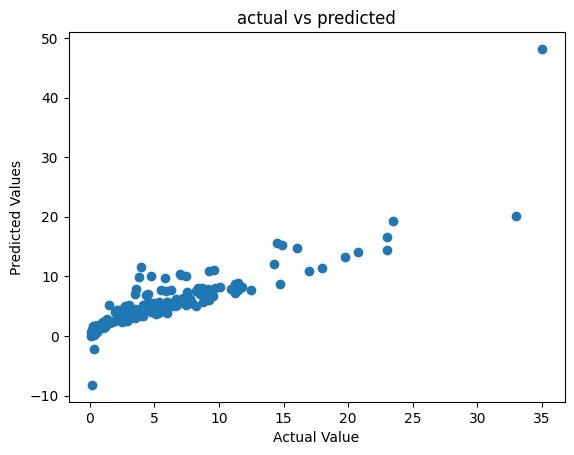

In [46]:
plt.scatter(train_y,pred_values)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Values")
plt.title("actual vs predicted")
plt.show()

In [47]:
test_data_pred=model.predict(test_x)


In [48]:
test_error=metrics.r2_score(test_y,test_data_pred)
print("r2 value:",test_error)

r2 value: 0.8135349871521534


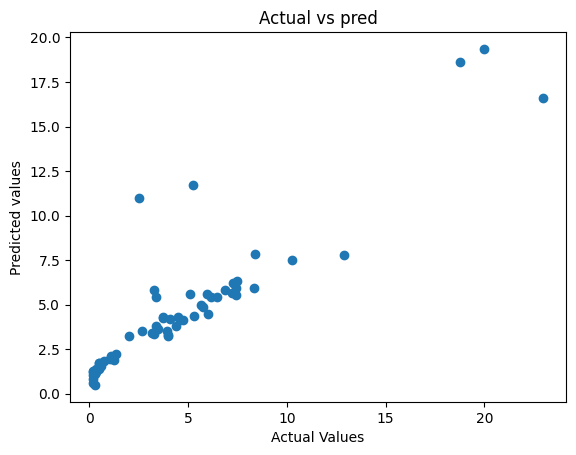

In [49]:
plt.scatter(test_y,test_data_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("Actual vs pred")
plt.show()